SOCIAL MEDIA SENTIMENT ANALYSIS USING MACHINE LEARNING 

Installing Datasets

In [ ]:
!pip install datasets

Defaulting to user installation because normal site-packages is not writeable


Data set overview

In [ ]:
import datasets
print(datasets.__version__)

4.4.2


In [ ]:
from datasets import load_dataset
ds = load_dataset("tweet_eval","sentiment")

In [ ]:
ds["train"][0]

{'text': '"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"',
 'label': 2}

In [ ]:
df1 = ds["train"].to_pandas()

In [ ]:
df2 = ds["test"].to_pandas()

In [ ]:
df3 = ds["validation"].to_pandas()

In [ ]:
df1.head()

,text,label
0,"""QT @user In the original draft of the 7th boo...",2
1,"""Ben Smith / Smith (concussion) remains out of...",1
2,Sorry bout the stream last night I crashed out...,1
3,Chase Headley's RBI double in the 8th inning o...,1
4,@user Alciato: Bee will invest 150 million in ...,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45615 entries, 0 to 45614
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45615 non-null  object
 1   label   45615 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 712.9+ KB


Text preprocessing

In [ ]:
#import required libraries
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df1['text'] = df1['text'].apply(lambda x : x.lower())

In [ ]:
def clean_text(text):
    if not isinstance(text,str):
        return text
        
    text = re.sub(r'https\S+|www\.\S+','',text)
    text = re.sub(r'@\w+','',text)
    text = text.translate(str.maketrans('','',string.punctuation))
    text = re.sub(r'\s+',' ',text).strip()
    return text

In [ ]:
df1['cleaned_text'] = df1['text'].apply(clean_text)

#tokenizing text
df1['token'] = df1['cleaned_text'].apply(lambda x : word_tokenize(x))

#removing stopwords
stop_words = stopwords.words('english')
df1['filtered_tokens'] = df1['token'].apply(lambda x : [word for word in x if word not in stop_words])

In [ ]:
stopword = df1['token'].apply(lambda x : [word for word in x if word not in stop_words])
alltokens =[]
for i in stopword:
    alltokens.extend(i)

In [ ]:
alltokens

['qt',
 'original',
 'draft',
 '7th',
 'book',
 'remus',
 'lupin',
 'survived',
 'battle',
 'hogwarts',
 'happybirthdayremuslupin',
 'ben',
 'smith',
 'smith',
 'concussion',
 'remains',
 'lineup',
 'thursday',
 'curtis',
 'nhl',
 'sj',
 'sorry',
 'bout',
 'stream',
 'last',
 'night',
 'crashed',
 'tonight',
 'sure',
 'back',
 'minecraft',
 'pc',
 'tomorrow',
 'night',
 'chase',
 'headleys',
 'rbi',
 'double',
 '8th',
 'inning',
 'david',
 'price',
 'snapped',
 'yankees',
 'streak',
 '33',
 'consecutive',
 'scoreless',
 'innings',
 'blue',
 'jays',
 'alciato',
 'bee',
 'invest',
 '150',
 'million',
 'january',
 'another',
 '200',
 'summer',
 'plans',
 'bring',
 'messi',
 '2017',
 'lit',
 'mum',
 'kerry',
 'louboutins',
 'wonder',
 'many',
 'willam',
 'owns',
 'look',
 'kerry',
 'warner',
 'wednesday',
 'soul',
 'train',
 'oct',
 '27',
 'halloween',
 'special',
 'ft',
 'tdot',
 'finest',
 'rocking',
 'miccrazy',
 'cactus',
 'night',
 'club',
 'adv',
 'ticket',
 '10',
 'wt',
 'costume',


In [ ]:
count = Counter(alltokens)
word_freq = pd.DataFrame(
    count.items(),
    columns=['word', 'frequency']
).sort_values(by='frequency', ascending=False)

In [ ]:
word_freq.to_csv("word_frequency.csv",index=False)

In [ ]:
word_freq = pd.read_csv("word_frequency.csv")
word_freq.head()

,word,frequency
0,tomorrow,7010
1,may,6600
2,day,3711
3,going,3023
4,night,2883


In [ ]:
top_20 = word_freq.head(20)

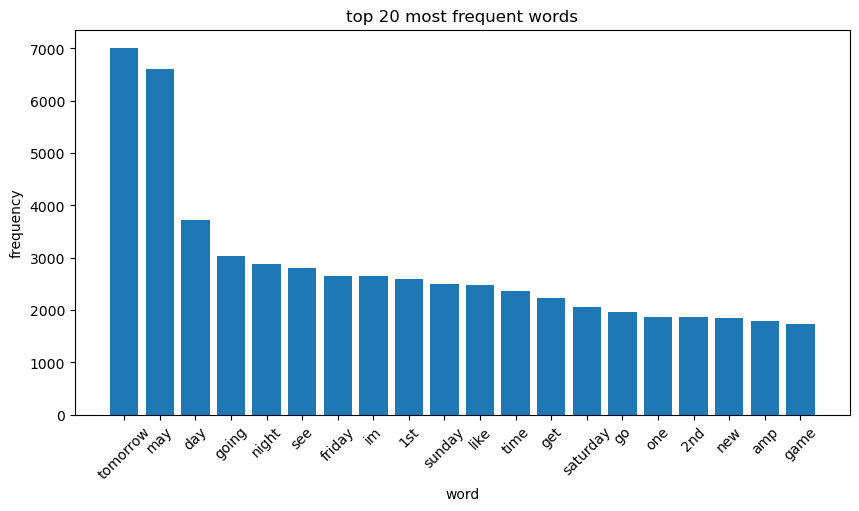

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(top_20['word'],top_20['frequency'])
plt.xticks(rotation = 45)
plt.title("top 20 most frequent words")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

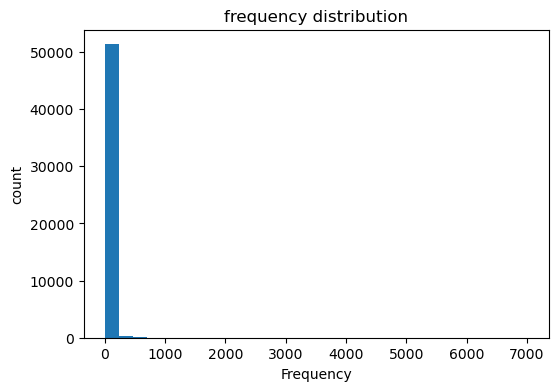

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(word_freq['frequency'],bins = 30)
plt.title("frequency distribution")
plt.xlabel('Frequency')
plt.ylabel('count')
plt.show()


In [ ]:
word_freq[word_freq['frequency'] > 100]

,word,frequency
0,tomorrow,7010
1,may,6600
2,day,3711
3,going,3023
4,night,2883
...,...,...
917,dogg,101
918,sports,101
919,bill,101
920,palin,101


In [ ]:
rare_words = word_freq[word_freq['frequency'] == 1]
len(rare_words)

31058

In [ ]:
word_freq['freq_cum'] = (word_freq['frequency'].cumsum() / word_freq['frequency'].sum()) * 100
word_freq.head()

,word,frequency,freq_cum
0,tomorrow,7010,1.317211
1,may,6600,2.557381
2,day,3711,3.254695
3,going,3023,3.822731
4,night,2883,4.364460


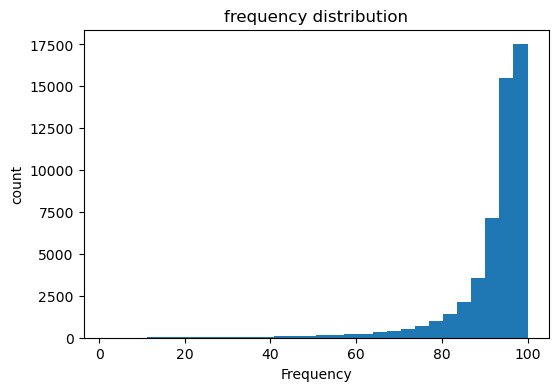

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(word_freq['freq_cum'],bins = 30)
plt.title("frequency distribution")
plt.xlabel('Frequency')
plt.ylabel('count')
plt.show()

The histogram of cumulative word frequencies shows a highly skewed distribution, where the majority of words occur with low frequency, while a small subset of words appears very frequently. This long-tail behaviour is characteristic of natural language data and aligns with Zipf’s Law. The observation further supports the need for frequency-based filtering during feature extraction to reduce noise and dimensionality


In [ ]:
import nltk

nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
lemmatizer = WordNetLemmatizer()

def pos_lemmatize(tokens):
    pos_tags = pos_tag(tokens)
    lemmatized_tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in pos_tags
    ]
    return lemmatized_tokens

In [ ]:
df1['lemmatized_tokens'] = df1['filtered_tokens'].apply(pos_lemmatize)

In [ ]:
df1['final_text'] = df1['lemmatized_tokens'].apply(lambda x: ' '.join(x))

Basic text cleaning was applied prior to exploratory data analysis to remove obvious noise while preserving linguistic characteristics. More advanced preprocessing steps, including lemmatization using pos tagging, were applied after EDA to prepare the text for feature extraction and modeling.

Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(
    max_features=5000,   
    ngram_range=(1,1)   
)

X_bow = bow_vectorizer.fit_transform(df1['final_text'])

print(X_bow.shape)

(45615, 5000)


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

X_tfidf = tfidf_vectorizer.fit_transform(df1['final_text'])

print(X_tfidf.shape)


(45615, 5000)


Model training

In [ ]:
X_b = X_bow
y = df1['label']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_b, X_test_b, y_train, y_test = train_test_split(X_b,y,test_size = 0.2,random_state = 42,stratify=y)

clf_b = LogisticRegression(max_iter=1000)
clf_b.fit(X_train,y_train)

y_pred_b = clf_b.predict(X_test_b)

In [ ]:
X_t = X_tfidf
y = df1['label']

X_train_t, X_test_t, y_train, y_test = train_test_split(X_t,y,test_size = 0.2,random_state = 42,stratify=y)

clf_t = LogisticRegression(max_iter=1000)
clf_t.fit(X_train_t,y_train)

y_pred_t = clf_t.predict(X_test_t)

In [ ]:
print("bow vocab size:",len(bow_vectorizer.vocabulary_))

bow vocab size: 5000


In [ ]:
print("tfidf vocab size:",len(tfidf_vectorizer.vocabulary_))

tfidf vocab size: 5000


In [ ]:
df4 = pd.DataFrame(X_bow.toarray(),columns = bow_vectorizer.get_feature_names_out()).head()

Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("Count Vectorizer results")
print(classification_report(y_test, y_pred_b))
print(confusion_matrix(y_test,y_pred_b))
print("Accuracy:",accuracy_score(y_test,y_pred_b))

Count Vectorizer results
              precision    recall  f1-score   support

           0       0.14      0.17      0.16      1419
           1       0.51      0.37      0.43      4134
           2       0.42      0.50      0.46      3570

    accuracy                           0.39      9123
   macro avg       0.35      0.35      0.35      9123
weighted avg       0.41      0.39      0.40      9123

[[ 247  453  719]
 [ 791 1548 1795]
 [ 713 1064 1793]]
Accuracy: 0.3932916803682999


In [ ]:
print("Tfidf vectorizer results")
print(classification_report(y_test, y_pred_t))
print(confusion_matrix(y_test,y_pred_t))
print("Accuracy:",accuracy_score(y_test,y_pred_t))

Tfidf vectorizer results
              precision    recall  f1-score   support

           0       0.60      0.32      0.41      1419
           1       0.62      0.75      0.68      4134
           2       0.69      0.65      0.67      3570

    accuracy                           0.65      9123
   macro avg       0.64      0.57      0.59      9123
weighted avg       0.64      0.65      0.64      9123

[[ 451  738  230]
 [ 215 3101  818]
 [  90 1146 2334]]
Accuracy: 0.6451825057546859


confusion Matrix

In [188]:
def confusion_mat(cm,classes,title):
    plt.figure(figsize=(6,5))
    plt.imshow(cm)
    plt.xticks(np.arange(len(classes)),classes)
    plt.yticks(np.arange(len(classes)),classes)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title(title)
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(
                i,j,cm[i,j],
                ha='center',va='center',
                color='b' if cm[i,j] > cm.max()/2 else 'w'
            )
    plt.tight_layout()
    plt.colorbar()
    plt.show()

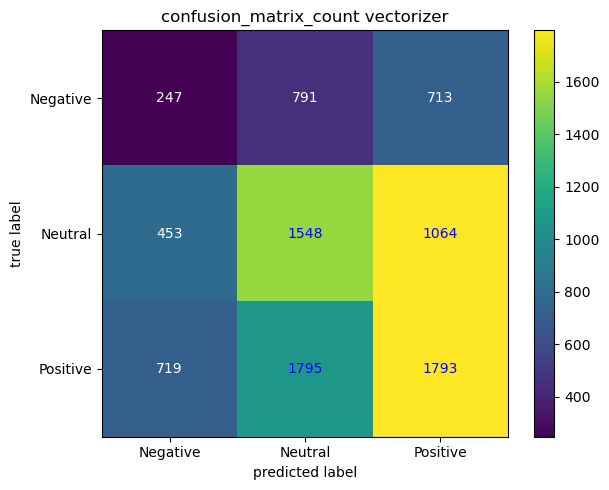

In [189]:

confusion_mat(
    cm = confusion_matrix(y_test,y_pred_b),
    classes = ['Negative','Neutral','Positive'],
    title = "confusion_matrix_count vectorizer"
)



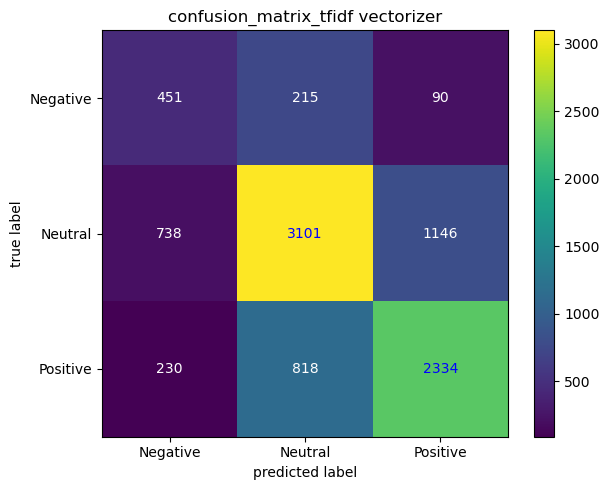

In [190]:
confusion_mat(
    cm = confusion_matrix(y_test,y_pred_t),
    classes = ['Negative','Neutral','Positive'],
    title = "confusion_matrix_tfidf vectorizer"
)

Performance comparison

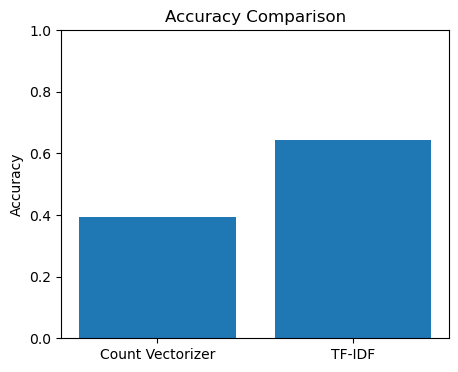

In [191]:
from sklearn.metrics import accuracy_score

acc_count = accuracy_score(y_test, y_pred_b)
acc_tfidf = accuracy_score(y_test, y_pred_t)

plt.figure(figsize=(5,4))
plt.bar(['Count Vectorizer','TF-IDF'], [acc_count, acc_tfidf])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0,1)
plt.show()


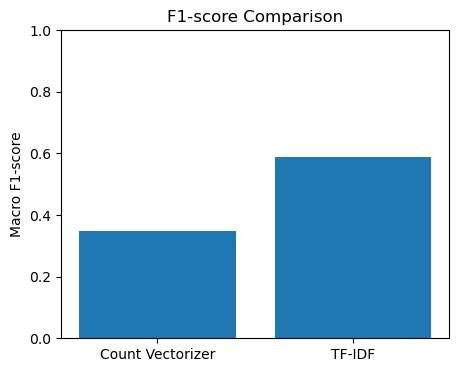

In [ ]:
from sklearn.metrics import f1_score

f1_count = f1_score(y_test, y_pred_b, average='macro')
f1_tfidf = f1_score(y_test, y_pred_t, average='macro')

plt.figure(figsize=(5,4))
plt.bar(['Count Vectorizer','TF-IDF'], [f1_count, f1_tfidf])
plt.ylabel('Macro F1-score')
plt.title('F1-score Comparison')
plt.ylim(0,1)
plt.show()


Conclusion

In [193]:
comparison_df = pd.DataFrame({
    'Vectorizer': ['Count Vectorizer', 'TF-IDF'],
    'Accuracy': [acc_count, acc_tfidf],
    'f1-score': [f1_count, f1_tfidf]
})

comparison_df

,Vectorizer,Accuracy,f1-score
0,Count Vectorizer,0.393292,0.347048
1,TF-IDF,0.645183,0.588764


TF-IDF outperforms Count Vectorization in both accuracy and macro F1-score, indicating better generalization and improved handling of noisy social media text. Hence, TF-IDF was selected as the final feature representation for sentiment classification